In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from symspellpy import SymSpell, Verbosity
import pkg_resources

In [13]:
survey_words = pd.read_csv('../data/clean/survey_word_counts.csv')

In [56]:
import matplotlib.pylab as pylab

params = {#'legend.fontsize': 'x-large',
         #'axes.labelsize': 20,
         #'axes.titlesize':'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)

In [17]:
sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [72]:
survey_words.columns = ['word','count','rank','freq']

In [75]:
survey_words = survey_words[['word', 'count','freq','rank']]

In [76]:
survey_words.to_csv('../data/clean/survey_distribution.tsv',sep = '\t', index=False)

In [22]:
other_freq = pd.DataFrame([sym_spell.words]).T

In [28]:
other_freq['freq'] = other_freq[0]/other_freq[0].sum()

In [38]:
other_freq['rank'] = other_freq.freq.rank(ascending=False)

In [63]:
other_freq.index.name='word'

In [65]:
other_freq.columns = ['count','freq','rank']

In [66]:
other_freq.to_csv('../data/clean/sym_spell_freq.tsv',sep='\t')

In [43]:
#survey_words.head(20)

Text(0.5, 0, 'Rank')

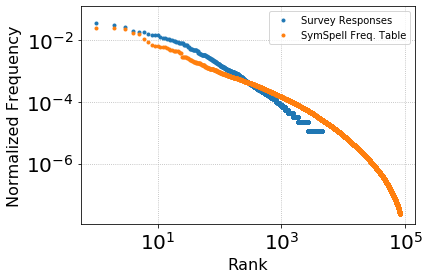

In [58]:
plt.plot(np.arange(0,len(survey_words)),survey_words.freq, marker='.',linewidth=0, label='Survey Responses')
plt.plot(np.arange(0,len(other_freq)),other_freq.freq.sort_values(ascending=False), marker='.',linewidth=0, label='SymSpell Freq. Table')
plt.legend()
plt.loglog()
plt.grid(linestyle=':')
plt.ylabel('Normalized Frequency',fontsize=16)
plt.xlabel('Rank',fontsize=16)
#plt.loglog()

[]

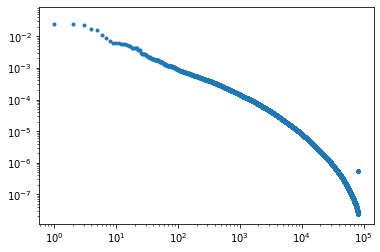

In [40]:
plt.plot(np.arange(0,len(other_freq)),other_freq.freq, marker='.',linewidth=0)
plt.loglog()